Win Rate: 0.76
R-Ratio: 0.46
% Risk per Trade: 0.01
# of Simulations: 20000.00
# of Trades: 252.00


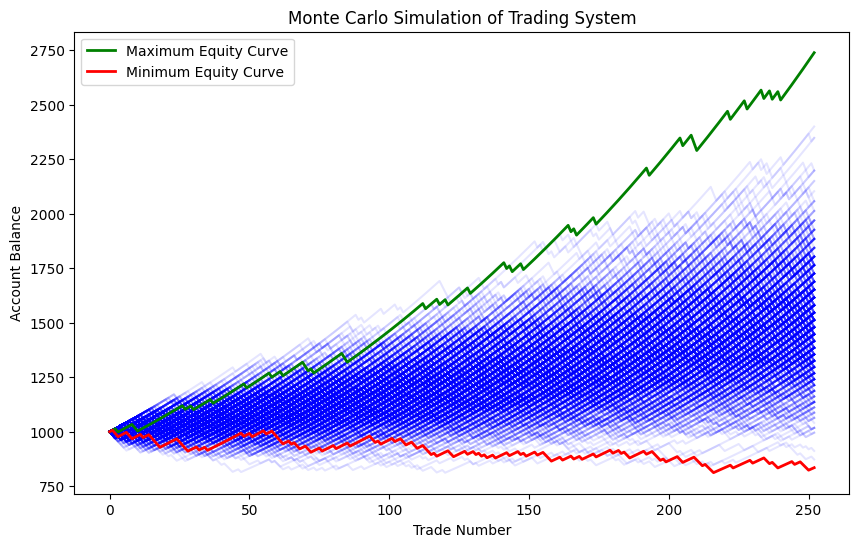

Starting Balance: 1000.00
Mean Final Balance: 1512.01
Standard Deviation: 226.28
Minimum Final Balance: 835.02
Maximum Final Balance: 2737.82
Maximum Drawdown of Worst Case: 0.30
Mean Maximum Drawdown: 0.09
99th Percentile Drawdown: 0.18


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def calculate_drawdown(balances):
    peak = balances[0]
    drawdowns = []
    for balance in balances:
        if balance > peak:
            peak = balance
        drawdown = (peak - balance) / peak
        drawdowns.append(drawdown)
    return drawdowns

def monte_carlo_simulation(win_rate, reward_to_risk, risk_per_trade, num_simulations, num_trades):
    all_balances = []
    final_balances = []
    max_drawdowns = []

    start_balance = 1000

    for _ in range(num_simulations):
        balance = start_balance  # Starting with a balance of 1 for simplicity
        balances = [balance]
        
        for _ in range(num_trades):
            if np.random.rand() < win_rate:
                # Win trade
                balance += balance * risk_per_trade * reward_to_risk
            else:
                # Lose trade
                balance -= balance * risk_per_trade

            balances.append(balance)
        
        all_balances.append(balances)
        final_balances.append(balance)
        max_drawdowns.append(max(calculate_drawdown(balances)))

    # # Plot the results
    # plt.figure(figsize=(10, 6))
    # for balances in all_balances[:1000]:
    #     plt.plot(balances, color='blue', alpha=0.1)

    # Select 1000 random simulations for plotting
    random_indices = random.sample(range(num_simulations), min(1000, num_simulations))

    # Plot the results
    plt.figure(figsize=(10, 6))
    for idx in random_indices:
        plt.plot(all_balances[idx], color='blue', alpha=0.1)
    
    plt.plot(all_balances[np.argmax(final_balances)], color='green', linewidth=2, label='Maximum Equity Curve')
    plt.plot(all_balances[np.argmin(final_balances)], color='red', linewidth=2, label='Minimum Equity Curve')
    plt.title('Monte Carlo Simulation of Trading System')
    plt.xlabel('Trade Number')
    plt.ylabel('Account Balance')
    plt.legend()
    plt.show()

    # Statistical summary of final balances and drawdowns
    max_drawdown_worst_case = max(max_drawdowns)
    mean_drawdown = np.mean(max_drawdowns)
    drawdown_99_percentile = np.percentile(max_drawdowns, 99)
    

    print(f'Starting Balance: {start_balance:.2f}')
    print(f'Mean Final Balance: {np.mean(final_balances):.2f}')
    print(f'Standard Deviation: {np.std(final_balances):.2f}')
    print(f'Minimum Final Balance: {np.min(final_balances):.2f}')
    print(f'Maximum Final Balance: {np.max(final_balances):.2f}')
    print(f'Maximum Drawdown of Worst Case: {max_drawdown_worst_case:.2f}')
    print(f'Mean Maximum Drawdown: {mean_drawdown:.2f}')
    print(f'99th Percentile Drawdown: {drawdown_99_percentile:.2f}')

# Example usage
win_rate = 0.76  # put win rate here
reward_to_risk = 0.46  # Reward to risk ratio 
risk_per_trade = 0.015  # Risking % of the trade
num_simulations = 20000  # Run X number of simulations
num_trades = 252  # Each simulation runs for X trades

print(f'Win Rate: {win_rate:.2f}')
print(f'R-Ratio: {reward_to_risk:.2f}')
print(f'% Risk per Trade: {risk_per_trade:.2f}')
print(f'# of Simulations: {num_simulations:.2f}')
print(f'# of Trades: {num_trades:.2f}')

monte_carlo_simulation(win_rate, reward_to_risk, risk_per_trade, num_simulations, num_trades)


Win Rate: 0.76
R-Ratio: 0.46
% Risk per Trade: 0.0150
# of Simulations: 20000.00
# of Trades: 504.00
Risk-Free Rate: 5.50%


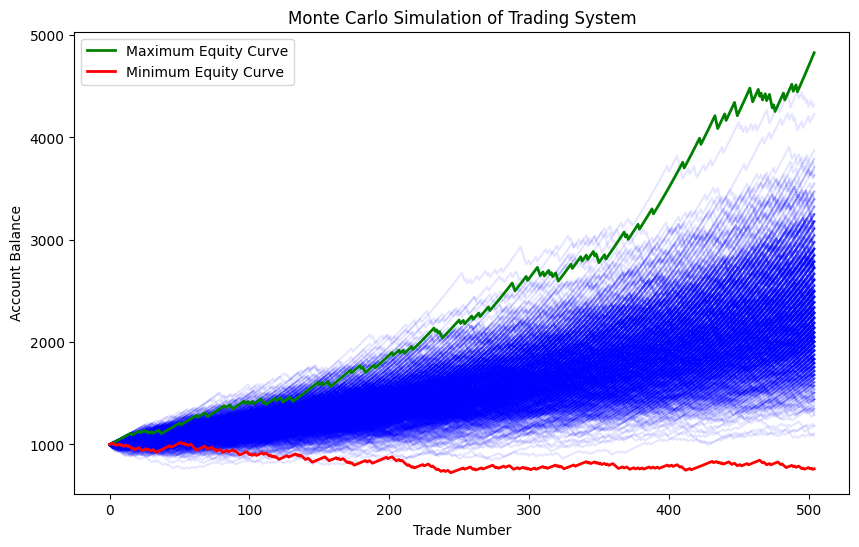

Starting Balance: 1000.00
Mean Final Balance: 2292.37
Standard Deviation: 490.31
Minimum Final Balance: 761.37
Maximum Final Balance: 4828.43
Maximum Drawdown of Worst Case: 0.33
Mean Maximum Drawdown: 0.11
99th Percentile Drawdown: 0.20
Sharpe Ratio: 2.42
Sortino Ratio: 350269265029952.12


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

def calculate_drawdown(balances):
    peak = balances[0]
    drawdowns = []
    for balance in balances:
        if balance > peak:
            peak = balance
        drawdown = (peak - balance) / peak
        drawdowns.append(drawdown)
    return drawdowns

def calculate_sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate / 252
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    return sharpe_ratio * np.sqrt(252)  # annualize the Sharpe ratio

def calculate_sortino_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate / 252
    downside_returns = excess_returns[excess_returns < 0]
    sortino_ratio = np.mean(excess_returns) / np.std(downside_returns)
    return sortino_ratio * np.sqrt(252)  # annualize the Sortino ratio

def monte_carlo_simulation(win_rate, reward_to_risk, risk_per_trade, num_simulations, num_trades, risk_free_rate):
    all_balances = []
    final_balances = []
    max_drawdowns = []
    all_returns = []

    start_balance = 1000

    for _ in range(num_simulations):
        balance = start_balance
        balances = [balance]
        daily_returns = []
        
        for _ in range(num_trades):
            if np.random.rand() < win_rate:
                # Win trade
                balance += balance * risk_per_trade * reward_to_risk
            else:
                # Lose trade
                balance -= balance * risk_per_trade

            daily_return = balance / balances[-1] - 1
            daily_returns.append(daily_return)
            balances.append(balance)
        
        all_balances.append(balances)
        final_balances.append(balance)
        max_drawdowns.append(max(calculate_drawdown(balances)))
        all_returns.append(daily_returns)

    # Select 1000 random simulations for plotting
    random_indices = random.sample(range(num_simulations), min(1000, num_simulations))

    # Plot the results
    plt.figure(figsize=(10, 6))
    for idx in random_indices:
        plt.plot(all_balances[idx], color='blue', alpha=0.1)
    
    plt.plot(all_balances[np.argmax(final_balances)], color='green', linewidth=2, label='Maximum Equity Curve')
    plt.plot(all_balances[np.argmin(final_balances)], color='red', linewidth=2, label='Minimum Equity Curve')
    plt.title('Monte Carlo Simulation of Trading System')
    plt.xlabel('Trade Number')
    plt.ylabel('Account Balance')
    plt.legend()
    plt.show()

    # Statistical summary of final balances and drawdowns
    max_drawdown_worst_case = max(max_drawdowns)
    mean_drawdown = np.mean(max_drawdowns)
    drawdown_99_percentile = np.percentile(max_drawdowns, 99)
    
    print(f'Starting Balance: {start_balance:.2f}')
    print(f'Mean Final Balance: {np.mean(final_balances):.2f}')
    print(f'Standard Deviation: {np.std(final_balances):.2f}')
    print(f'Minimum Final Balance: {np.min(final_balances):.2f}')
    print(f'Maximum Final Balance: {np.max(final_balances):.2f}')
    print(f'Maximum Drawdown of Worst Case: {max_drawdown_worst_case:.2f}')
    print(f'Mean Maximum Drawdown: {mean_drawdown:.2f}')
    print(f'99th Percentile Drawdown: {drawdown_99_percentile:.2f}')

    # Flatten all returns to calculate Sharpe and Sortino ratios
    all_returns_flat = np.concatenate(all_returns)
    
    sharpe_ratio = calculate_sharpe_ratio(all_returns_flat, risk_free_rate)
    sortino_ratio = calculate_sortino_ratio(all_returns_flat, risk_free_rate)
    
    print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
    print(f'Sortino Ratio: {sortino_ratio:.2f}')

# Example usage
win_rate = 0.76  # put win rate here
reward_to_risk = 0.46  # Reward to risk ratio 
risk_per_trade = 0.015  # Risking % of the trade
num_simulations = 20000  # Run X number of simulations
num_trades = 252*2  # Each simulation runs for X trades
risk_free_rate = 0.055  # Annual risk-free rate

print(f'Win Rate: {win_rate:.2f}')
print(f'R-Ratio: {reward_to_risk:.2f}')
print(f'% Risk per Trade: {risk_per_trade:.3f}')
print(f'# of Simulations: {num_simulations:.1f}')
print(f'# of Trades: {num_trades:.2f}')
print(f'Risk-Free Rate: {risk_free_rate:.2%}')

monte_carlo_simulation(win_rate, reward_to_risk, risk_per_trade, num_simulations, num_trades, risk_free_rate)
